In [ ]:
import os
import nltk
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from gensim.corpora import Dictionary
from gensim.models import LdaModel, TfidfModel
from nltk.stem import PorterStemmer

# Download stopwords and tokenize data
nltk.download('stopwords')
nltk.download('punkt_tab')

# Define the folder containing the text files
folder_path = 'doc'

# Set up stop words and preprocessing function
stop_words = set(stopwords.words('english'))
downweight_words = {"assessment", "graded", "credit", "requires", "cmkl" }  # Words to down-weight



def preprocess(text):
    tokens = word_tokenize(text.lower())  # Convert to lowercase and tokenize
    tokens = [word for word in tokens if word.isalpha() and word not in stop_words]
    return tokens

# Read and preprocess each file in the folder
documents = []
competency_labels = []
for filename in os.listdir(folder_path):
    file_path = os.path.join(folder_path, filename)
    with open(file_path, 'r', encoding='utf-8') as f:
        # Extract competency name from the first line
        first_line = f.readline().strip()
        competency_name = re.findall(r'\((.*?)\)', first_line)
        competency_labels.append(competency_name[0] if competency_name else "Unknown")

        text = f.read()
        documents.append(preprocess(text))

# Check the first processed document
print(documents[0])

# Create a dictionary from the processed documents
dictionary = Dictionary(documents)

# Adjust the frequency of specific words in the dictionary
for word in downweight_words:
    if word in dictionary.token2id:
        token_id = dictionary.token2id[word]
        dictionary.dfs[token_id] *= 0.1  # Down-weight by 90%

# Convert documents into a bag-of-words format
corpus_bow = [dictionary.doc2bow(doc) for doc in documents]

# Create the TF-IDF model
tfidf_model = TfidfModel(corpus_bow)

# Apply the TF-IDF model to the corpus to get the TF-IDF representation
corpus_tfidf = tfidf_model[corpus_bow]

# Train the LDA model using the TF-IDF corpus
num_topics = 50  # Number of topics
lda_model = LdaModel(corpus=corpus_tfidf, id2word=dictionary, num_topics=num_topics, passes=300)

# Print topics with keywords
for idx, topic in lda_model.print_topics(-1):
    print(f"Topic {idx + 1}: {topic}")

# Group documents by top 5 topics
document_groups = {}  # Dictionary to store groups of documents by top 5 topics

print("\nDocument Grouping by Top 5 Topics:")
for i, doc in enumerate(corpus_tfidf):
    # Get topic probabilities for the document
    topic_probabilities = lda_model.get_document_topics(doc)
    # Sort topics by probability in descending order and select the top 5 topics
    top_5_topics = sorted(topic_probabilities, key=lambda x: x[1], reverse=True)[:5]

    # Create a sorted tuple of the top 5 topic IDs to use as a unique key
    top_5_topic_ids = tuple(sorted([topic_id for topic_id, prob in top_5_topics]))

    # Group documents by the unique combination of top 5 topics
    if top_5_topic_ids not in document_groups:
        document_groups[top_5_topic_ids] = []
    document_groups[top_5_topic_ids].append(f"Document {i + 1} (Original: {competency_labels[i]})")

# Print each group of documents
for topic_ids, docs in document_groups.items():
    print(f"\nGroup with Top 5 Topics {topic_ids}:")
    for doc in docs:
        print(f"  {doc}")

# Save the model and dictionary
lda_model.save("lda_model.model")
dictionary.save("dictionary.dict")

# Example: Find top topics for the first document
document_topics = lda_model.get_document_topics(corpus_tfidf[0])
top_5_topics = sorted(document_topics, key=lambda x: x[1], reverse=True)[:5]
print("\nTop 5 topics for the first document:", top_5_topics)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


['identity', 'code', 'required', 'false', 'credits', 'graded', 'responsible', 'instructor', 'puttha', 'sakkaplangkul', 'prerequisites', 'none', 'distribution', 'areas', 'skills', 'assessments', 'skill', 'code', 'knowledge', 'topic', 'differentiation', 'assessment', 'type', 'imported', 'assessment', 'assessment', 'title', 'assessment', 'concept', 'limits', 'derivatives', 'assessment', 'description', 'take', 'quiz', 'show', 'solve', 'problems', 'definition', 'limits', 'derivatives', 'problem', 'solving', 'class', 'complexity', 'level', 'understand', 'skill', 'code', 'knowledge', 'topic', 'differentiation', 'assessment', 'type', 'imported', 'assessment', 'assessment', 'title', 'assessment', 'limits', 'derivatives', 'problem', 'solving', 'assessment', 'description', 'take', 'quiz', 'show', 'solve', 'problems', 'definition', 'limits', 'derivatives', 'class', 'complexity', 'level', 'apply']
Topic 1: 0.008*"random" + 0.004*"ecosystem" + 0.004*"events" + 0.004*"variable" + 0.004*"tournaments" 

In [ ]:
!pip install bertopic


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.7/143.7 kB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 38.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.8/88.8 kB 6.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.9/56.9 kB 3.6 MB/s eta 0:00:00


Need to do stemming and input more down weight words

testing changing the valuable like topic number

Use Stemmer


In [ ]:
import os
import nltk
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from gensim.corpora import Dictionary
from gensim.models import LdaModel, TfidfModel
from nltk.stem import PorterStemmer

# Download stopwords and tokenize data (if not already downloaded)
nltk.download('stopwords')
nltk.download('punkt_tab')

# Define the folder containing the text files
folder_path = 'doc'

# Set up stop words and preprocessing function
stop_words = set(stopwords.words('english'))
downweight_words = {"assessment", "graded", "credit", "requires", "cmkl", "complex", "level", "detail", "competency", "identity", "description", "instructor" }  # Words to down-weight
#initialize stemmer
stemmer = PorterStemmer()


def preprocess(text):
    tokens = word_tokenize(text.lower())  # Convert to lowercase and tokenize
    tokens = [stemmer.stem(word) for word in tokens if word.isalpha() and word not in stop_words]
    return tokens

# Read and preprocess each file in the folder
documents = []
competency_labels = []
for filename in os.listdir(folder_path):
    file_path = os.path.join(folder_path, filename)
    with open(file_path, 'r', encoding='utf-8') as f:
        # Extract competency name from the first line
        first_line = f.readline().strip()
        competency_name = re.findall(r'\((.*?)\)', first_line)
        competency_labels.append(competency_name[0] if competency_name else "Unknown")

        text = f.read()
        documents.append(preprocess(text))

# Check the first processed document
print(documents[0])

# Create a dictionary from the processed documents
dictionary = Dictionary(documents)

# Adjust the frequency of specific words in the dictionary
for word in downweight_words:
    if word in dictionary.token2id:
        token_id = dictionary.token2id[word]
        dictionary.dfs[token_id] *= 0.1  # Down-weight by 90%

# Convert documents into a bag-of-words format
corpus_bow = [dictionary.doc2bow(doc) for doc in documents]

# Create the TF-IDF model
tfidf_model = TfidfModel(corpus_bow)

# Apply the TF-IDF model to the corpus to get the TF-IDF representation
corpus_tfidf = tfidf_model[corpus_bow]

# Train the LDA model using the TF-IDF corpus
num_topics = 50  # Number of topics
lda_model = LdaModel(corpus=corpus_tfidf, id2word=dictionary, num_topics=num_topics, passes=300)

# Print topics with keywords
for idx, topic in lda_model.print_topics(-1):
    print(f"Topic {idx + 1}: {topic}")

# Group documents by top 5 topics
document_groups = {}  # Dictionary to store groups of documents by top 5 topics

print("\nDocument Grouping by Top 5 Topics:")
for i, doc in enumerate(corpus_tfidf):
    # Get topic probabilities for the document
    topic_probabilities = lda_model.get_document_topics(doc)
    # Sort topics by probability in descending order and select the top 5 topics
    top_5_topics = sorted(topic_probabilities, key=lambda x: x[1], reverse=True)[:5]

    # Create a sorted tuple of the top 5 topic IDs to use as a unique key
    top_5_topic_ids = tuple(sorted([topic_id for topic_id, prob in top_5_topics]))

    # Group documents by the unique combination of top 5 topics
    if top_5_topic_ids not in document_groups:
        document_groups[top_5_topic_ids] = []
    document_groups[top_5_topic_ids].append(f"Document {i + 1} (Original: {competency_labels[i]})")

# Print each group of documents
for topic_ids, docs in document_groups.items():
    print(f"\nGroup with Top 5 Topics {topic_ids}:")
    for doc in docs:
        print(f"  {doc}")

# Save the model and dictionary
lda_model.save("lda_model.model")
dictionary.save("dictionary.dict")

# Example: Find top topics for the first document
document_topics = lda_model.get_document_topics(corpus_tfidf[0])
top_5_topics = sorted(document_topics, key=lambda x: x[1], reverse=True)[:5]
print("\nTop 5 topics for the first document:", top_5_topics)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


['ident', 'code', 'requir', 'fals', 'credit', 'grade', 'respons', 'instructor', 'puttha', 'sakkaplangkul', 'prerequisit', 'none', 'distribut', 'area', 'skill', 'assess', 'skill', 'code', 'knowledg', 'topic', 'differenti', 'assess', 'type', 'import', 'assess', 'assess', 'titl', 'assess', 'concept', 'limit', 'deriv', 'assess', 'descript', 'take', 'quiz', 'show', 'solv', 'problem', 'definit', 'limit', 'deriv', 'problem', 'solv', 'class', 'complex', 'level', 'understand', 'skill', 'code', 'knowledg', 'topic', 'differenti', 'assess', 'type', 'import', 'assess', 'assess', 'titl', 'assess', 'limit', 'deriv', 'problem', 'solv', 'assess', 'descript', 'take', 'quiz', 'show', 'solv', 'problem', 'definit', 'limit', 'deriv', 'class', 'complex', 'level', 'appli']
Topic 1: 0.014*"magnet" + 0.012*"storag" + 0.011*"platform" + 0.011*"field" + 0.011*"oversea" + 0.010*"ml" + 0.009*"limit" + 0.009*"websit" + 0.008*"storytel" + 0.008*"studi"
Topic 2: 0.009*"leadership" + 0.006*"inclus" + 0.005*"persuas" + 

Use Lemmatizer

In [1]:
import os
import nltk
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from gensim.corpora import Dictionary
from gensim.models import LdaModel, TfidfModel
from nltk.stem import WordNetLemmatizer

# Download stopwords and tokenize data (if not already downloaded)
nltk.download('stopwords')
nltk.download('punkt_tab')
nltk.download('wordnet')

# Define the folder containing the text files
folder_path = 'doc'

# Set up stop words and preprocessing function
stop_words = set(stopwords.words('english'))
downweight_words = {"assessment", "graded", "credit", "require", "cmkl", "complex", "level", "detail", "competency", "identity", "description", "instructor"}  # Words to down-weight
#initialize stemmer
stemmer = WordNetLemmatizer()


def preprocess(text):
    tokens = word_tokenize(text.lower())  # Convert to lowercase and tokenize
    tokens = [stemmer.lemmatize(word) for word in tokens if word.isalpha() and word not in stop_words]
    return tokens

# Read and preprocess each file in the folder
documents = []
competency_labels = []
for filename in os.listdir(folder_path):
    file_path = os.path.join(folder_path, filename)
    with open(file_path, 'r', encoding='utf-8') as f:
        # Extract competency name from the first line
        first_line = f.readline().strip()
        competency_name = re.findall(r'\((.*?)\)', first_line)
        competency_labels.append(competency_name[0] if competency_name else "Unknown")

        text = f.read()
        documents.append(preprocess(text))

# Check the first processed document
print(documents[0])

# Create a dictionary from the processed documents
dictionary = Dictionary(documents)

#remove low value token
dictionary.filter_extremes(no_below=5, no_above=0.5)  # Remove words in <5 docs or >50% of docs

# Adjust the frequency of specific words in the dictionary
for word in downweight_words:
    if word in dictionary.token2id:
        token_id = dictionary.token2id[word]
        dictionary.dfs[token_id] *= 0.1  # Down-weight by 90%

# Convert documents into a bag-of-words format
corpus_bow = [dictionary.doc2bow(doc) for doc in documents]

# Create the TF-IDF model
tfidf_model = TfidfModel(corpus_bow)

# Apply the TF-IDF model to the corpus to get the TF-IDF representation
corpus_tfidf = tfidf_model[corpus_bow]

# Train the LDA model using the TF-IDF corpus
num_topics = 50  # Number of topics
lda_model = LdaModel(corpus=corpus_tfidf, id2word=dictionary, num_topics=num_topics, passes=300)

# Print topics with keywords
for idx, topic in lda_model.print_topics(-1):
    print(f"Topic {idx + 1}: {topic}")

# Group documents by top 5 topics
document_groups = {}  # Dictionary to store groups of documents by top 5 topics

print("\nDocument Grouping by Top 5 Topics:")
for i, doc in enumerate(corpus_tfidf):
    # Get topic probabilities for the document
    topic_probabilities = lda_model.get_document_topics(doc)
    # Sort topics by probability in descending order and select the top 5 topics
    top_5_topics = sorted(topic_probabilities, key=lambda x: x[1], reverse=True)[:5]

    # Print the top 5 topics for the document
    print(f"Document {i + 1} (Original: {competency_labels[i]}):")
    for topic_id, prob in top_5_topics:
        print(f"  Topic {topic_id}: {prob:.4f}")

    # Create a sorted tuple of the top 5 topic IDs to use as a unique key
    top_5_topic_ids = tuple(sorted([topic_id for topic_id, prob in top_5_topics]))

    # Group documents by the unique combination of top 5 topics
    if top_5_topic_ids not in document_groups:
        document_groups[top_5_topic_ids] = []
    document_groups[top_5_topic_ids].append(f"Document {i + 1} (Original: {competency_labels[i]})")


# Print each group of documents
for topic_ids, docs in document_groups.items():
    print(f"\nGroup with Top 5 Topics {topic_ids}:")
    for doc in docs:
        print(f"  {doc}")

# Save the model and dictionary
lda_model.save("lda_model.model")
dictionary.save("dictionary.dict")

# Example: Find top topics for the first document
document_topics = lda_model.get_document_topics(corpus_tfidf[0])
top_5_topics = sorted(document_topics, key=lambda x: x[1], reverse=True)[:5]



[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


['identity', 'code', 'required', 'true', 'credit', 'graded', 'description', 'proactiveness', 'attitude', 'anticipates', 'possible', 'problem', 'task', 'proactive', 'individual', 'act', 'anticipation', 'future', 'need', 'rather', 'waiting', 'passively', 'respond', 'situation', 'arise', 'proactiveness', 'includes', 'service', 'orientation', 'tendency', 'offer', 'help', 'take', 'responsibility', 'perceived', 'need', 'focus', 'continuous', 'improvement', 'constant', 'awareness', 'every', 'situation', 'process', 'matter', 'successful', 'made', 'better', 'responsible', 'instructor', 'apirujee', 'rujirek', 'prerequisite', 'none', 'distribution', 'area', 'humanity', 'social', 'science', 'skill', 'assessment', 'skill', 'code', 'knowledge', 'topic', 'proactiveness', 'assessment', 'type', 'observational', 'assessment', 'assessment', 'title', 'assessment', 'proactiveness', 'assessment', 'description', 'behavioral', 'evaluation', 'faculty', 'complexity', 'level', 'apply']
Topic 1: 0.048*"data" + 0.

filtering the topic that have less weight out

In [20]:
import os
import nltk
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from gensim.corpora import Dictionary
from gensim.models import LdaModel, TfidfModel
from nltk.stem import WordNetLemmatizer

# Download stopwords and tokenize data (if not already downloaded)
nltk.download('stopwords')
nltk.download('punkt_tab')
nltk.download('wordnet')

# Define the folder containing the text files
folder_path = 'doc'

# Set up stop words and preprocessing function
stop_words = set(stopwords.words('english'))
downweight_words = {"assessment", "graded", "credit", "require", "cmkl", "complex", "level", "detail", "competency", "identity", "description", "instructor"}  # Words to down-weight
#initialize stemmer
stemmer = WordNetLemmatizer()


def preprocess(text):
    tokens = word_tokenize(text.lower())  # Convert to lowercase and tokenize
    tokens = [stemmer.lemmatize(word) for word in tokens if word.isalpha() and word not in stop_words]
    return tokens

# Read and preprocess each file in the folder
documents = []
competency_labels = []
for filename in os.listdir(folder_path):
    file_path = os.path.join(folder_path, filename)
    with open(file_path, 'r', encoding='utf-8') as f:
        # Extract competency name from the first line
        first_line = f.readline().strip()
        competency_name = re.findall(r'\((.*?)\)', first_line)
        competency_labels.append(competency_name[0] if competency_name else "Unknown")

        text = f.read()
        documents.append(preprocess(text))


# Create a dictionary from the processed documents
dictionary = Dictionary(documents)

#remove low value token
dictionary.filter_extremes(no_below=5, no_above=0.5)  # Remove words in <5 docs or >50% of docs

# Adjust the frequency of specific words in the dictionary
for word in downweight_words:
    if word in dictionary.token2id:
        token_id = dictionary.token2id[word]
        dictionary.dfs[token_id] *= 0.1  # Down-weight by 90%

# Convert documents into a bag-of-words format
corpus_bow = [dictionary.doc2bow(doc) for doc in documents]

# Create the TF-IDF model
tfidf_model = TfidfModel(corpus_bow)

# Apply the TF-IDF model to the corpus to get the TF-IDF representation
corpus_tfidf = tfidf_model[corpus_bow]

# Train the LDA model using the TF-IDF corpus
num_topics = 50  # Number of topics
lda_model = LdaModel(corpus=corpus_tfidf, id2word=dictionary, num_topics=num_topics, passes=300)

# Define a minimum threshold for topic probabilities
min_topic_probability = 0.1  # Topics with probabilities below this will be filtered out

# Identify topics to keep based on the threshold
valid_topics = []
for idx, topic in lda_model.print_topics(-1):
    keywords = topic.split(" + ")
    weight_sum = sum(float(keyword.split("*")[0]) for keyword in keywords)
    if weight_sum >= min_topic_probability:
        valid_topics.append(idx)
        print(f"Topic {idx}: {topic}")

# Filter out invalid topics
invalid_topics = set(range(lda_model.num_topics)) - set(valid_topics)
print("Small weight topic: ",invalid_topics)
# Create a new corpus excluding the invalid topics
filtered_corpus_tfidf = []
for doc in corpus_tfidf:
    filtered_doc = [
        (topic_id, weight)
        for topic_id, weight in lda_model.get_document_topics(doc)
        if topic_id not in invalid_topics
    ]
    filtered_corpus_tfidf.append(filtered_doc)

# Group documents by top 5 topics
document_groups = {}  # Dictionary to store groups of documents by top 5 topics

print("\nDocument Grouping by Top 5 Topics:")
for i, doc in enumerate(filtered_corpus_tfidf):

    # Sort topics by probability in descending order and select the top 5 topics
    top_5_topics = sorted(
        [(topic_id, prob) for topic_id, prob in doc if topic_id not in invalid_topics],
        key=lambda x: x[1],
        reverse=True
    )[:5]

    # Print the top 5 topics for the document
    print(f"Document {i + 1} (Original: {competency_labels[i]}):")
    for topic_id, prob in top_5_topics:
        print(f"  Topic {topic_id}: {prob:.4f}")

    # Create a sorted tuple of the top 5 topic IDs to use as a unique key
    top_5_topic_ids = tuple(sorted([topic_id for topic_id, prob in top_5_topics]))

    # Group documents by the unique combination of top 5 topics
    if top_5_topic_ids not in document_groups:
        document_groups[top_5_topic_ids] = []
    document_groups[top_5_topic_ids].append(f"Document {i + 1} (Original: {competency_labels[i]})")


# Print each group of documents
for topic_ids, docs in document_groups.items():
    print(f"\nGroup with Top 5 Topics {topic_ids}:")
    for doc in docs:
        print(f"  {doc}")

# Save the model and dictionary
lda_model.save("lda_model.model")
dictionary.save("dictionary.dict")

# Example: Find top topics for the first document
document_topics = lda_model.get_document_topics(corpus_tfidf[0])
top_5_topics = sorted(document_topics, key=lambda x: x[1], reverse=True)[:5]



[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Topic 1: 0.033*"r" + 0.029*"team" + 0.028*"undergraduate" + 0.022*"must" + 0.019*"student" + 0.018*"group" + 0.018*"project" + 0.017*"principle" + 0.017*"semester" + 0.016*"industrial"
Topic 2: 0.026*"distributed" + 0.020*"three" + 0.017*"web" + 0.014*"beyond" + 0.013*"financial" + 0.013*"detailed" + 0.013*"content" + 0.012*"critique" + 0.012*"operation" + 0.011*"give"
Topic 3: 0.050*"industry" + 0.036*"community" + 0.033*"domain" + 0.032*"participant" + 0.028*"project" + 0.020*"within" + 0.020*"offer" + 0.019*"research" + 0.018*"fostering" + 0.018*"analysis"
Topic 4: 0.041*"software" + 0.023*"process" + 0.021*"development" + 0.016*"understanding" + 0.016*"student" + 0.016*"strategy" + 0.015*"exam" + 0.015*"imported" + 0.015*"concept" + 0.014*"analysis"
Topic 5: 0.044*"requirement" + 0.034*"input" + 0.031*"output" + 0.025*"recommendation" + 0.025*"document" + 0.022*"definition" + 0.020*"deep" + 0.016*"main" + 0.016*"mathematics" + 0.011*"three"
Topic 7: 0.029*"market" + 0.024*"game" + 

try the matching 3 topics

In [11]:


import os
import nltk
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from gensim.corpora import Dictionary
from gensim.models import LdaModel, TfidfModel
from nltk.stem import WordNetLemmatizer
from collections import defaultdict

# Download stopwords and tokenize data (if not already downloaded)
nltk.download('stopwords')
nltk.download('punkt_tab')
nltk.download('wordnet')

# Define the folder containing the text files
folder_path = 'doc'

# Set up stop words and preprocessing function
stop_words = set(stopwords.words('english'))
downweight_words = {"assessment", "graded", "credit", "require", "cmkl", "complex", "level", "detail", "competency", "identity", "description", "instructor"}  # Words to down-weight
#initialize stemmer
stemmer = WordNetLemmatizer()


def preprocess(text):
    tokens = word_tokenize(text.lower())  # Convert to lowercase and tokenize
    tokens = [stemmer.lemmatize(word) for word in tokens if word.isalpha() and word not in stop_words]
    return tokens

# Read and preprocess each file in the folder
documents = []
competency_labels = []
for filename in os.listdir(folder_path):
    file_path = os.path.join(folder_path, filename)
    with open(file_path, 'r', encoding='utf-8') as f:
        # Extract competency name from the first line
        first_line = f.readline().strip()
        competency_name = re.findall(r'\((.*?)\)', first_line)
        competency_labels.append(competency_name[0] if competency_name else "Unknown")

        text = f.read()
        documents.append(preprocess(text))

# Check the first processed document
print(documents[0])

# Create a dictionary from the processed documents
dictionary = Dictionary(documents)

#remove low value token
dictionary.filter_extremes(no_below=5, no_above=0.5)  # Remove words in <5 docs or >50% of docs

# Adjust the frequency of specific words in the dictionary
for word in downweight_words:
    if word in dictionary.token2id:
        token_id = dictionary.token2id[word]
        dictionary.dfs[token_id] *= 0.1  # Down-weight by 90%

# Convert documents into a bag-of-words format
corpus_bow = [dictionary.doc2bow(doc) for doc in documents]

# Create the TF-IDF model
tfidf_model = TfidfModel(corpus_bow)

# Apply the TF-IDF model to the corpus to get the TF-IDF representation
corpus_tfidf = tfidf_model[corpus_bow]

# Train the LDA model using the TF-IDF corpus
num_topics = 50  # Number of topics
lda_model = LdaModel(corpus=corpus_tfidf, id2word=dictionary, num_topics=num_topics, passes=300)

# Define a minimum threshold for topic probabilities
min_topic_probability = 0.1  # Topics with probabilities below this will be filtered out

# Identify topics to keep based on the threshold
valid_topics = []
for idx, topic in lda_model.print_topics(-1):
    keywords = topic.split(" + ")
    weight_sum = sum(float(keyword.split("*")[0]) for keyword in keywords)
    if weight_sum >= min_topic_probability:
        valid_topics.append(idx)
        print(f"Topic {idx + 1}: {topic}")

# Filter out invalid topics
invalid_topics = set(range(lda_model.num_topics)) - set(valid_topics)

# Create a new corpus excluding the invalid topics
filtered_corpus_tfidf = []
for doc in corpus_tfidf:
    filtered_doc = [
        (topic_id, weight)
        for topic_id, weight in lda_model.get_document_topics(doc)
        if topic_id not in invalid_topics
    ]
    filtered_corpus_tfidf.append(filtered_doc)

# Group documents by top 5 topics
document_groups = defaultdict(list)  # Dictionary to store groups of documents
topic_groups = defaultdict(set)      # Store shared topics for each group
# Store the top 5 topics for each document
document_top_topics = []

print("\nDocument Grouping by Top 5 Topics:")
for i, doc in enumerate(filtered_corpus_tfidf):

    # Sort topics by probability in descending order and select the top 5 topics
    top_5_topics = sorted(doc, key=lambda x: x[1], reverse=True)[:5]
    top_5_topic_ids = [topic_id for topic_id, prob in top_5_topics]

    # Save the top 5 topics for this document
    document_top_topics.append((i + 1, top_5_topic_ids))

    # Print the top 5 topics for the document
    print(f"Document {i + 1} (Original: {competency_labels[i]}):")
    for topic_id, prob in top_5_topics:
        print(f"  Topic {topic_id}: {prob:.4f}")

# Group documents based on topic intersection
group_id = 1  # Unique ID for each group
visited_docs = set()  # Track documents that have already been grouped

# Minimum number of shared topics to consider documents part of the same group
min_shared_topics = 3

for doc_id, top_5_topics in document_top_topics:
    if doc_id in visited_docs:
        continue  # Skip already grouped documents

    # Start a new group
    current_group = [doc_id]
    visited_docs.add(doc_id)
    shared_topics = set(top_5_topics)  # Initialize shared topics for the group

    # Compare this document's topics with others
    for other_doc_id, other_top_5_topics in document_top_topics:
        if other_doc_id in visited_docs:
            continue  # Skip already grouped documents

        # Count shared topics
        common_topics = set(top_5_topics).intersection(other_top_5_topics)
        if len(common_topics) >= min_shared_topics:
            current_group.append(other_doc_id)
            visited_docs.add(other_doc_id)
            shared_topics = shared_topics.intersection(common_topics)  # Update shared topics


    document_groups[group_id] = current_group
    topic_groups[group_id] = sorted(shared_topics)
    group_id += 1

# Print grouped documents
for group_id, docs in document_groups.items():
    shared_topics = topic_groups[group_id]
    print(f"\nGroup (Topics: {shared_topics}):")
    for doc in docs:
        print(f"  Document {doc} (Original: {competency_labels[doc - 1]})")

# Save the model and dictionary
lda_model.save("lda_model.model")
dictionary.save("dictionary.dict")

# Example: Find top topics for the first document
document_topics = lda_model.get_document_topics(corpus_tfidf[0])
top_5_topics = sorted(document_topics, key=lambda x: x[1], reverse=True)[:5]




[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


['identity', 'code', 'required', 'true', 'credit', 'graded', 'description', 'proactiveness', 'attitude', 'anticipates', 'possible', 'problem', 'task', 'proactive', 'individual', 'act', 'anticipation', 'future', 'need', 'rather', 'waiting', 'passively', 'respond', 'situation', 'arise', 'proactiveness', 'includes', 'service', 'orientation', 'tendency', 'offer', 'help', 'take', 'responsibility', 'perceived', 'need', 'focus', 'continuous', 'improvement', 'constant', 'awareness', 'every', 'situation', 'process', 'matter', 'successful', 'made', 'better', 'responsible', 'instructor', 'apirujee', 'rujirek', 'prerequisite', 'none', 'distribution', 'area', 'humanity', 'social', 'science', 'skill', 'assessment', 'skill', 'code', 'knowledge', 'topic', 'proactiveness', 'assessment', 'type', 'observational', 'assessment', 'assessment', 'title', 'assessment', 'proactiveness', 'assessment', 'description', 'behavioral', 'evaluation', 'faculty', 'complexity', 'level', 'apply']
Topic 1: 0.070*"visual" + 

create a graph that represent the relationship between documents and topics

Outliers (nodes with low connections): []


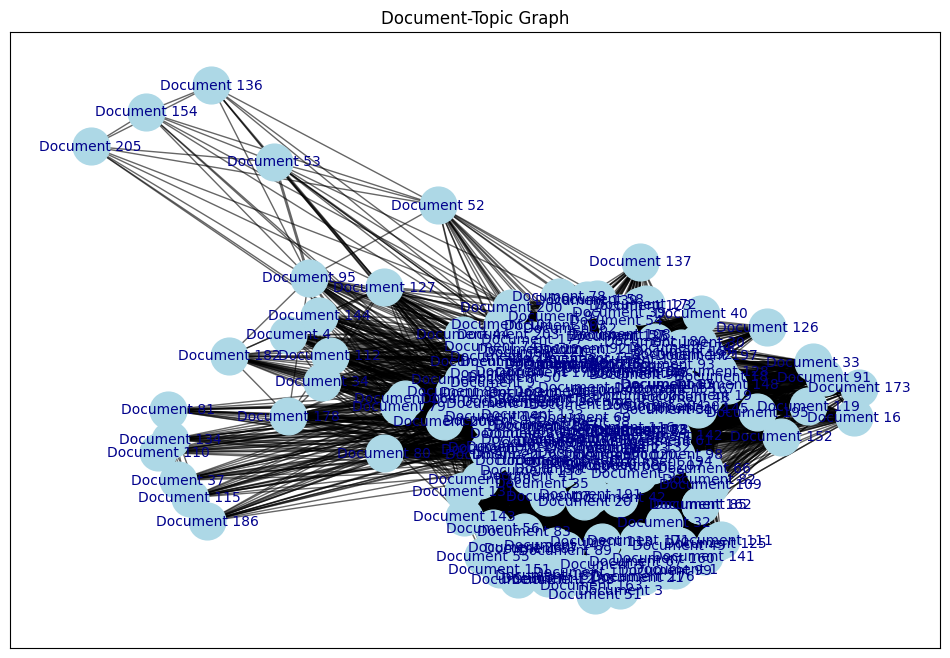

In [3]:
import networkx as nx
import matplotlib.pyplot as plt

# Create a graph
G = nx.Graph()

# Add nodes for each document
for i in range(len(documents)):
    G.add_node(i + 1, label=f"Document {i + 1}")

# Add edges based on shared top topics
for i, doc1 in enumerate(corpus_tfidf):
    topics1 = {topic_id for topic_id, prob in lda_model.get_document_topics(doc1)}
    for j, doc2 in enumerate(corpus_tfidf):
        if i >= j:  # Avoid duplicate edges
            continue
        topics2 = {topic_id for topic_id, prob in lda_model.get_document_topics(doc2)}
        shared_topics = topics1.intersection(topics2)
        if shared_topics:
            # Edge weight based on the number of shared topics
            G.add_edge(i + 1, j + 1, weight=len(shared_topics))

# Calculate degree centrality and identify outliers (nodes with few/no connections)
threshold = 1  # Minimum number of connections for a node to not be an outlier
outliers = [node for node, degree in G.degree() if degree <= threshold]

# Print identified outliers
print("Outliers (nodes with low connections):", outliers)

# Remove outliers from the graph
G.remove_nodes_from(outliers)

# Draw the graph
pos = nx.spring_layout(G)  # Position nodes using the spring layout
weights = nx.get_edge_attributes(G, 'weight')

# Node labels
labels = nx.get_node_attributes(G, 'label')

# Plot the graph
plt.figure(figsize=(12, 8))
nx.draw_networkx_nodes(G, pos, node_size=700, node_color="lightblue")
nx.draw_networkx_edges(G, pos, width=[w for w in weights.values()], alpha=0.6)
nx.draw_networkx_labels(G, pos, labels, font_size=10, font_color="darkblue")
plt.title("Document-Topic Graph")
plt.show()


with only 10 topic

In [ ]:
import os
import nltk
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from gensim.corpora import Dictionary
from gensim.models import LdaModel, TfidfModel
from nltk.stem import WordNetLemmatizer

# Download stopwords and tokenize data (if not already downloaded)
nltk.download('stopwords')
nltk.download('punkt_tab')
nltk.download('wordnet')

# Define the folder containing the text files
folder_path = 'doc'

# Set up stop words and preprocessing function
stop_words = set(stopwords.words('english'))
downweight_words = {"assessment", "graded", "credit", "requires", "cmkl","complex", "level", "detail", "competency", "identity", "description", "instructor"}  # Words to down-weight
#initialize stemmer
stemmer = WordNetLemmatizer()


def preprocess(text):
    tokens = word_tokenize(text.lower())  # Convert to lowercase and tokenize
    tokens = [stemmer.lemmatize(word) for word in tokens if word.isalpha() and word not in stop_words]
    return tokens

# Read and preprocess each file in the folder
documents = []
competency_labels = []
for filename in os.listdir(folder_path):
    file_path = os.path.join(folder_path, filename)
    with open(file_path, 'r', encoding='utf-8') as f:
        # Extract competency name from the first line
        first_line = f.readline().strip()
        competency_name = re.findall(r'\((.*?)\)', first_line)
        competency_labels.append(competency_name[0] if competency_name else "Unknown")

        text = f.read()
        documents.append(preprocess(text))

# Check the first processed document
print(documents[0])

# Create a dictionary from the processed documents
dictionary = Dictionary(documents)

#remove low value token
dictionary.filter_extremes(no_below=5, no_above=0.5)  # Remove words in <5 docs or >50% of docs

# Adjust the frequency of specific words in the dictionary
for word in downweight_words:
    if word in dictionary.token2id:
        token_id = dictionary.token2id[word]
        dictionary.dfs[token_id] *= 0.1  # Down-weight by 90%

# Convert documents into a bag-of-words format
corpus_bow = [dictionary.doc2bow(doc) for doc in documents]

# Create the TF-IDF model
tfidf_model = TfidfModel(corpus_bow)

# Apply the TF-IDF model to the corpus to get the TF-IDF representation
corpus_tfidf = tfidf_model[corpus_bow]

# Train the LDA model using the TF-IDF corpus
num_topics = 10  # Number of topics
lda_model = LdaModel(corpus=corpus_tfidf, id2word=dictionary, num_topics=num_topics, passes=300)

# Print topics with keywords
for idx, topic in lda_model.print_topics(-1):
    print(f"Topic {idx + 1}: {topic}")

# Group documents by top 5 topics
document_groups = {}  # Dictionary to store groups of documents by top 5 topics

print("\nDocument Grouping by Top 5 Topics:")
for i, doc in enumerate(corpus_tfidf):
    # Get topic probabilities for the document
    topic_probabilities = lda_model.get_document_topics(doc)
    # Sort topics by probability in descending order and select the top 5 topics
    top_5_topics = sorted(topic_probabilities, key=lambda x: x[1], reverse=True)[:5]

    # Print the top 5 topics for the document
    print(f"Document {i + 1} (Original: {competency_labels[i]}):")
    for topic_id, prob in top_5_topics:
        print(f"  Topic {topic_id}: {prob:.4f}")

    # Create a sorted tuple of the top 5 topic IDs to use as a unique key
    top_5_topic_ids = tuple(sorted([topic_id for topic_id, prob in top_5_topics]))

    # Group documents by the unique combination of top 5 topics
    if top_5_topic_ids not in document_groups:
        document_groups[top_5_topic_ids] = []
    document_groups[top_5_topic_ids].append(f"Document {i + 1} (Original: {competency_labels[i]})")


# Print each group of documents
for topic_ids, docs in document_groups.items():
    print(f"\nGroup with Top 5 Topics {topic_ids}:")
    for doc in docs:
        print(f"  {doc}")

# Save the model and dictionary
lda_model.save("lda_model.model")
dictionary.save("dictionary.dict")

# Example: Find top topics for the first document
document_topics = lda_model.get_document_topics(corpus_tfidf[0])
top_5_topics = sorted(document_topics, key=lambda x: x[1], reverse=True)[:5]



[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


['identity', 'code', 'required', 'false', 'credit', 'graded', 'responsible', 'instructor', 'puttha', 'sakkaplangkul', 'prerequisite', 'none', 'distribution', 'area', 'skill', 'assessment', 'skill', 'code', 'knowledge', 'topic', 'differentiation', 'assessment', 'type', 'imported', 'assessment', 'assessment', 'title', 'assessment', 'concept', 'limit', 'derivative', 'assessment', 'description', 'take', 'quiz', 'show', 'solve', 'problem', 'definition', 'limit', 'derivative', 'problem', 'solving', 'class', 'complexity', 'level', 'understand', 'skill', 'code', 'knowledge', 'topic', 'differentiation', 'assessment', 'type', 'imported', 'assessment', 'assessment', 'title', 'assessment', 'limit', 'derivative', 'problem', 'solving', 'assessment', 'description', 'take', 'quiz', 'show', 'solve', 'problem', 'definition', 'limit', 'derivative', 'class', 'complexity', 'level', 'apply']
Topic 1: 0.008*"industry" + 0.006*"business" + 0.005*"participant" + 0.005*"project" + 0.005*"domain" + 0.004*"strate

with 20 topic

In [ ]:
import os
import nltk
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from gensim.corpora import Dictionary
from gensim.models import LdaModel, TfidfModel
from nltk.stem import WordNetLemmatizer

# Download stopwords and tokenize data (if not already downloaded)
nltk.download('stopwords')
nltk.download('punkt_tab')
nltk.download('wordnet')

# Define the folder containing the text files
folder_path = 'doc'

# Set up stop words and preprocessing function
stop_words = set(stopwords.words('english'))
downweight_words = {"assessment", "graded", "credit", "requires", "cmkl","complex", "level", "detail", "competency", "identity", "description", "instructor" }  # Words to down-weight
#initialize stemmer
stemmer = WordNetLemmatizer()


def preprocess(text):
    tokens = word_tokenize(text.lower())  # Convert to lowercase and tokenize
    tokens = [stemmer.lemmatize(word) for word in tokens if word.isalpha() and word not in stop_words]
    return tokens

# Read and preprocess each file in the folder
documents = []
competency_labels = []
for filename in os.listdir(folder_path):
    file_path = os.path.join(folder_path, filename)
    with open(file_path, 'r', encoding='utf-8') as f:
        # Extract competency name from the first line
        first_line = f.readline().strip()
        competency_name = re.findall(r'\((.*?)\)', first_line)
        competency_labels.append(competency_name[0] if competency_name else "Unknown")

        text = f.read()
        documents.append(preprocess(text))

# Check the first processed document
print(documents[0])

# Create a dictionary from the processed documents
dictionary = Dictionary(documents)

#remove low value token
dictionary.filter_extremes(no_below=5, no_above=0.5)  # Remove words in <5 docs or >50% of docs

# Adjust the frequency of specific words in the dictionary
for word in downweight_words:
    if word in dictionary.token2id:
        token_id = dictionary.token2id[word]
        dictionary.dfs[token_id] *= 0.1  # Down-weight by 90%

# Convert documents into a bag-of-words format
corpus_bow = [dictionary.doc2bow(doc) for doc in documents]

# Create the TF-IDF model
tfidf_model = TfidfModel(corpus_bow)

# Apply the TF-IDF model to the corpus to get the TF-IDF representation
corpus_tfidf = tfidf_model[corpus_bow]

# Train the LDA model using the TF-IDF corpus
num_topics = 20  # Number of topics
lda_model = LdaModel(corpus=corpus_tfidf, id2word=dictionary, num_topics=num_topics, passes=300)

# Print topics with keywords
for idx, topic in lda_model.print_topics(-1):
    print(f"Topic {idx + 1}: {topic}")

# Group documents by top 5 topics
document_groups = {}  # Dictionary to store groups of documents by top 5 topics

print("\nDocument Grouping by Top 5 Topics:")
for i, doc in enumerate(corpus_tfidf):
    # Get topic probabilities for the document
    topic_probabilities = lda_model.get_document_topics(doc)
    # Sort topics by probability in descending order and select the top 5 topics
    top_5_topics = sorted(topic_probabilities, key=lambda x: x[1], reverse=True)[:5]

    # Print the top 5 topics for the document
    print(f"Document {i + 1} (Original: {competency_labels[i]}):")
    for topic_id, prob in top_5_topics:
        print(f"  Topic {topic_id}: {prob:.4f}")

    # Create a sorted tuple of the top 5 topic IDs to use as a unique key
    top_5_topic_ids = tuple(sorted([topic_id for topic_id, prob in top_5_topics]))

    # Group documents by the unique combination of top 5 topics
    if top_5_topic_ids not in document_groups:
        document_groups[top_5_topic_ids] = []
    document_groups[top_5_topic_ids].append(f"Document {i + 1} (Original: {competency_labels[i]})")


# Print each group of documents
for topic_ids, docs in document_groups.items():
    print(f"\nGroup with Top 5 Topics {topic_ids}:")
    for doc in docs:
        print(f"  {doc}")

# Save the model and dictionary
lda_model.save("lda_model.model")
dictionary.save("dictionary.dict")

# Example: Find top topics for the first document
document_topics = lda_model.get_document_topics(corpus_tfidf[0])
top_5_topics = sorted(document_topics, key=lambda x: x[1], reverse=True)[:5]



[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


['identity', 'code', 'required', 'false', 'credit', 'graded', 'responsible', 'instructor', 'puttha', 'sakkaplangkul', 'prerequisite', 'none', 'distribution', 'area', 'skill', 'assessment', 'skill', 'code', 'knowledge', 'topic', 'differentiation', 'assessment', 'type', 'imported', 'assessment', 'assessment', 'title', 'assessment', 'concept', 'limit', 'derivative', 'assessment', 'description', 'take', 'quiz', 'show', 'solve', 'problem', 'definition', 'limit', 'derivative', 'problem', 'solving', 'class', 'complexity', 'level', 'understand', 'skill', 'code', 'knowledge', 'topic', 'differentiation', 'assessment', 'type', 'imported', 'assessment', 'assessment', 'title', 'assessment', 'limit', 'derivative', 'problem', 'solving', 'assessment', 'description', 'take', 'quiz', 'show', 'solve', 'problem', 'definition', 'limit', 'derivative', 'class', 'complexity', 'level', 'apply']
Topic 1: 0.011*"community" + 0.007*"local" + 0.005*"firm" + 0.005*"web" + 0.005*"economics" + 0.004*"agile" + 0.004*"

use topic number 30


In [ ]:
import os
import nltk
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from gensim.corpora import Dictionary
from gensim.models import LdaModel, TfidfModel
from nltk.stem import WordNetLemmatizer

# Download stopwords and tokenize data (if not already downloaded)
nltk.download('stopwords')
nltk.download('punkt_tab')
nltk.download('wordnet')

# Define the folder containing the text files
folder_path = 'doc'

# Set up stop words and preprocessing function
stop_words = set(stopwords.words('english'))
downweight_words = {"assessment", "graded", "credit", "requires", "cmkl","complex", "level", "detail", "competency", "identity", "description", "instructor"}  # Words to down-weight
#initialize stemmer
stemmer = WordNetLemmatizer()


def preprocess(text):
    tokens = word_tokenize(text.lower())  # Convert to lowercase and tokenize
    tokens = [stemmer.lemmatize(word) for word in tokens if word.isalpha() and word not in stop_words]
    return tokens

# Read and preprocess each file in the folder
documents = []
competency_labels = []
for filename in os.listdir(folder_path):
    file_path = os.path.join(folder_path, filename)
    with open(file_path, 'r', encoding='utf-8') as f:
        # Extract competency name from the first line
        first_line = f.readline().strip()
        competency_name = re.findall(r'\((.*?)\)', first_line)
        competency_labels.append(competency_name[0] if competency_name else "Unknown")

        text = f.read()
        documents.append(preprocess(text))

# Check the first processed document
print(documents[0])

# Create a dictionary from the processed documents
dictionary = Dictionary(documents)

#remove low value token
dictionary.filter_extremes(no_below=5, no_above=0.5)  # Remove words in <5 docs or >50% of docs

# Adjust the frequency of specific words in the dictionary
for word in downweight_words:
    if word in dictionary.token2id:
        token_id = dictionary.token2id[word]
        dictionary.dfs[token_id] *= 0.1  # Down-weight by 90%

# Convert documents into a bag-of-words format
corpus_bow = [dictionary.doc2bow(doc) for doc in documents]

# Create the TF-IDF model
tfidf_model = TfidfModel(corpus_bow)

# Apply the TF-IDF model to the corpus to get the TF-IDF representation
corpus_tfidf = tfidf_model[corpus_bow]

# Train the LDA model using the TF-IDF corpus
num_topics = 30  # Number of topics
lda_model = LdaModel(corpus=corpus_tfidf, id2word=dictionary, num_topics=num_topics, passes=300)

# Print topics with keywords
for idx, topic in lda_model.print_topics(-1):
    print(f"Topic {idx + 1}: {topic}")

# Group documents by top 5 topics
document_groups = {}  # Dictionary to store groups of documents by top 5 topics

print("\nDocument Grouping by Top 5 Topics:")
for i, doc in enumerate(corpus_tfidf):
    # Get topic probabilities for the document
    topic_probabilities = lda_model.get_document_topics(doc)
    # Sort topics by probability in descending order and select the top 5 topics
    top_5_topics = sorted(topic_probabilities, key=lambda x: x[1], reverse=True)[:5]

    # Print the top 5 topics for the document
    print(f"Document {i + 1} (Original: {competency_labels[i]}):")
    for topic_id, prob in top_5_topics:
        print(f"  Topic {topic_id}: {prob:.4f}")

    # Create a sorted tuple of the top 5 topic IDs to use as a unique key
    top_5_topic_ids = tuple(sorted([topic_id for topic_id, prob in top_5_topics]))

    # Group documents by the unique combination of top 5 topics
    if top_5_topic_ids not in document_groups:
        document_groups[top_5_topic_ids] = []
    document_groups[top_5_topic_ids].append(f"Document {i + 1} (Original: {competency_labels[i]})")


# Print each group of documents
for topic_ids, docs in document_groups.items():
    print(f"\nGroup with Top 5 Topics {topic_ids}:")
    for doc in docs:
        print(f"  {doc}")

# Save the model and dictionary
lda_model.save("lda_model.model")
dictionary.save("dictionary.dict")

# Example: Find top topics for the first document
document_topics = lda_model.get_document_topics(corpus_tfidf[0])
top_5_topics = sorted(document_topics, key=lambda x: x[1], reverse=True)[:5]



[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


['identity', 'code', 'required', 'false', 'credit', 'graded', 'responsible', 'instructor', 'puttha', 'sakkaplangkul', 'prerequisite', 'none', 'distribution', 'area', 'skill', 'assessment', 'skill', 'code', 'knowledge', 'topic', 'differentiation', 'assessment', 'type', 'imported', 'assessment', 'assessment', 'title', 'assessment', 'concept', 'limit', 'derivative', 'assessment', 'description', 'take', 'quiz', 'show', 'solve', 'problem', 'definition', 'limit', 'derivative', 'problem', 'solving', 'class', 'complexity', 'level', 'understand', 'skill', 'code', 'knowledge', 'topic', 'differentiation', 'assessment', 'type', 'imported', 'assessment', 'assessment', 'title', 'assessment', 'limit', 'derivative', 'problem', 'solving', 'assessment', 'description', 'take', 'quiz', 'show', 'solve', 'problem', 'definition', 'limit', 'derivative', 'class', 'complexity', 'level', 'apply']
Topic 1: 0.009*"web" + 0.007*"explainability" + 0.007*"mobile" + 0.007*"prototyping" + 0.006*"compression" + 0.006*"r

use 40 topic


In [ ]:
import os
import nltk
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from gensim.corpora import Dictionary
from gensim.models import LdaModel, TfidfModel
from nltk.stem import WordNetLemmatizer

# Download stopwords and tokenize data (if not already downloaded)
nltk.download('stopwords')
nltk.download('punkt_tab')
nltk.download('wordnet')

# Define the folder containing the text files
folder_path = 'doc'

# Set up stop words and preprocessing function
stop_words = set(stopwords.words('english'))
downweight_words = {"assessment", "graded", "credit", "requires", "cmkl","complex", "level", "detail", "competency", "identity", "description", "instructor"}  # Words to down-weight
#initialize stemmer
stemmer = WordNetLemmatizer()


def preprocess(text):
    tokens = word_tokenize(text.lower())  # Convert to lowercase and tokenize
    tokens = [stemmer.lemmatize(word) for word in tokens if word.isalpha() and word not in stop_words]
    return tokens

# Read and preprocess each file in the folder
documents = []
competency_labels = []
for filename in os.listdir(folder_path):
    file_path = os.path.join(folder_path, filename)
    with open(file_path, 'r', encoding='utf-8') as f:
        # Extract competency name from the first line
        first_line = f.readline().strip()
        competency_name = re.findall(r'\((.*?)\)', first_line)
        competency_labels.append(competency_name[0] if competency_name else "Unknown")

        text = f.read()
        documents.append(preprocess(text))

# Check the first processed document
print(documents[0])

# Create a dictionary from the processed documents
dictionary = Dictionary(documents)

#remove low value token
dictionary.filter_extremes(no_below=5, no_above=0.5)  # Remove words in <5 docs or >50% of docs

# Adjust the frequency of specific words in the dictionary
for word in downweight_words:
    if word in dictionary.token2id:
        token_id = dictionary.token2id[word]
        dictionary.dfs[token_id] *= 0.1  # Down-weight by 90%

# Convert documents into a bag-of-words format
corpus_bow = [dictionary.doc2bow(doc) for doc in documents]

# Create the TF-IDF model
tfidf_model = TfidfModel(corpus_bow)

# Apply the TF-IDF model to the corpus to get the TF-IDF representation
corpus_tfidf = tfidf_model[corpus_bow]

# Train the LDA model using the TF-IDF corpus
num_topics = 40  # Number of topics
lda_model = LdaModel(corpus=corpus_tfidf, id2word=dictionary, num_topics=num_topics, passes=300)

# Print topics with keywords
for idx, topic in lda_model.print_topics(-1):
    print(f"Topic {idx + 1}: {topic}")

# Group documents by top 5 topics
document_groups = {}  # Dictionary to store groups of documents by top 5 topics

print("\nDocument Grouping by Top 5 Topics:")
for i, doc in enumerate(corpus_tfidf):
    # Get topic probabilities for the document
    topic_probabilities = lda_model.get_document_topics(doc)
    # Sort topics by probability in descending order and select the top 5 topics
    top_5_topics = sorted(topic_probabilities, key=lambda x: x[1], reverse=True)[:5]

    # Print the top 5 topics for the document
    print(f"Document {i + 1} (Original: {competency_labels[i]}):")
    for topic_id, prob in top_5_topics:
        print(f"  Topic {topic_id}: {prob:.4f}")

    # Create a sorted tuple of the top 5 topic IDs to use as a unique key
    top_5_topic_ids = tuple(sorted([topic_id for topic_id, prob in top_5_topics]))

    # Group documents by the unique combination of top 5 topics
    if top_5_topic_ids not in document_groups:
        document_groups[top_5_topic_ids] = []
    document_groups[top_5_topic_ids].append(f"Document {i + 1} (Original: {competency_labels[i]})")


# Print each group of documents
for topic_ids, docs in document_groups.items():
    print(f"\nGroup with Top 5 Topics {topic_ids}:")
    for doc in docs:
        print(f"  {doc}")

# Save the model and dictionary
lda_model.save("lda_model.model")
dictionary.save("dictionary.dict")

# Example: Find top topics for the first document
document_topics = lda_model.get_document_topics(corpus_tfidf[0])
top_5_topics = sorted(document_topics, key=lambda x: x[1], reverse=True)[:5]



[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


['identity', 'code', 'required', 'false', 'credit', 'graded', 'responsible', 'instructor', 'puttha', 'sakkaplangkul', 'prerequisite', 'none', 'distribution', 'area', 'skill', 'assessment', 'skill', 'code', 'knowledge', 'topic', 'differentiation', 'assessment', 'type', 'imported', 'assessment', 'assessment', 'title', 'assessment', 'concept', 'limit', 'derivative', 'assessment', 'description', 'take', 'quiz', 'show', 'solve', 'problem', 'definition', 'limit', 'derivative', 'problem', 'solving', 'class', 'complexity', 'level', 'understand', 'skill', 'code', 'knowledge', 'topic', 'differentiation', 'assessment', 'type', 'imported', 'assessment', 'assessment', 'title', 'assessment', 'limit', 'derivative', 'problem', 'solving', 'assessment', 'description', 'take', 'quiz', 'show', 'solve', 'problem', 'definition', 'limit', 'derivative', 'class', 'complexity', 'level', 'apply']
Topic 1: 0.009*"negotiation" + 0.008*"matrix" + 0.006*"linear" + 0.005*"message" + 0.005*"investigative" + 0.005*"per

create a graph for the document linking it by the topics